In [1]:
#data used: open source default of a credit card clients dataset from the UCI ML repository: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
#citation :  Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.
#Project Objective : Data Analysis and Visualisation using Seaborn and Pandas
#clients' age distribution by their education level (1 = graduate school; 2 = university; 3 = high school; 4 = others) and their marital status (1 = married; 2 = single).

In [2]:
!pip install seaborn --upgrade

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set(style = "darkgrid")
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

C:\Users\DELL PC\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
pd.set_option('display.precision',3)
pd.options.display.float_format = '{:.3f}'.format
df = pd.read_excel(r'C:\Users\DELL PC\default of credit card clients.xls', header = 1, index_col=0)
df.head(7)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [5]:
df.shape

(30000, 24)

In [6]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [8]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,...,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,167484.323,1.604,1.853,1.552,35.486,-0.017,-0.134,-0.166,-0.221,-0.266,...,43262.949,40311.401,38871.760,5663.581,5921.163,5225.681,4826.077,4799.388,5215.503,0.221
std,129747.662,0.489,0.790,0.522,9.218,1.124,1.197,1.197,1.169,1.133,...,64332.856,60797.156,59554.108,16563.280,23040.870,17606.961,15666.160,15278.306,17777.466,0.415
min,10000.000,1.000,0.000,0.000,21.000,-2.000,-2.000,-2.000,-2.000,-2.000,...,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,1.000,1.000,1.000,28.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,2326.750,1763.000,1256.000,1000.000,833.000,390.000,296.000,252.500,117.750,0.000
50%,140000.000,2.000,2.000,2.000,34.000,0.000,0.000,0.000,0.000,0.000,...,19052.000,18104.500,17071.000,2100.000,2009.000,1800.000,1500.000,1500.000,1500.000,0.000
75%,240000.000,2.000,2.000,2.000,41.000,0.000,0.000,0.000,0.000,0.000,...,54506.000,50190.500,49198.250,5006.000,5000.000,4505.000,4013.250,4031.500,4000.000,0.000
max,1000000.000,2.000,6.000,3.000,79.000,8.000,8.000,8.000,8.000,8.000,...,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000,1.000


In [9]:
df["default payment next month"].value_counts(normalize=True)

0   0.779
1   0.221
Name: default payment next month, dtype: float64

In [10]:
df["MARRIAGE"].value_counts(normalize=True)

2   0.532
1   0.455
3   0.011
0   0.002
Name: MARRIAGE, dtype: float64

In [11]:
from numpy import unique
counts = df.nunique() 
for_delete = [i for i,v in enumerate(counts) if v==1]
if for_delete==[]:
  print('Numbers of the useless columns are: empty (it means all our columns are useful).')
else:
  print('Numbers of the useless columns are:',for_delete)
df.drop(for_delete,axis=1,inplace=True)
print('\nDimensionalities of our dataset after dropping are:', '\n', 'objects (clients) = ', '\t', '\t',df.shape[0],
      '\n', 'features (column names) = ','\t',df.shape[1])
if (df.shape[0]==30000) and (df.shape[1]==24):
  print('\nThus, dimensionalities of our dataset after the dropping process have not changed.\n')
print("Numbers (Nr) of unique values (UV) for each column and its percent (%):\n")
print('Nr \t UV \t %')
print('======================')
for i in range(df.shape[1]):
    num=len(unique(df.iloc[:, i]))
    percentage=float(num)/df.shape[0]*100
    print('%d\t %d\t %.1f' % (i, num, percentage))
print('======================')

Numbers of the useless columns are: empty (it means all our columns are useful).

Dimensionalities of our dataset after dropping are: 
 objects (clients) =  	 	 30000 
 features (column names) =  	 24

Thus, dimensionalities of our dataset after the dropping process have not changed.

Numbers (Nr) of unique values (UV) for each column and its percent (%):

Nr 	 UV 	 %
0	 81	 0.3
1	 2	 0.0
2	 7	 0.0
3	 4	 0.0
4	 56	 0.2
5	 11	 0.0
6	 11	 0.0
7	 11	 0.0
8	 11	 0.0
9	 10	 0.0
10	 10	 0.0
11	 22723	 75.7
12	 22346	 74.5
13	 22026	 73.4
14	 21548	 71.8
15	 21010	 70.0
16	 20604	 68.7
17	 7943	 26.5
18	 7899	 26.3
19	 7518	 25.1
20	 6937	 23.1
21	 6897	 23.0
22	 6939	 23.1
23	 2	 0.0


In [12]:
df.corr().style.background_gradient(cmap='BrBG')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


In [13]:
df_example=pd.DataFrame(df,columns=df.columns.tolist()[0:6])
df_example.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0
ID,,,,,,
1,20000,2,2,1,24,2
2,120000,2,2,2,26,-1
3,90000,2,2,2,34,0
4,50000,2,2,1,37,0
5,50000,1,2,1,57,-1


In [14]:
df_unique = pd.DataFrame(df, columns=df.columns.tolist()[11:23])
df_unique.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,
1,3913,3102,689,0,0,0,0,689,0,0,0,0
2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Text(0.5, 1.0, 'Correlation atrix\n\n')

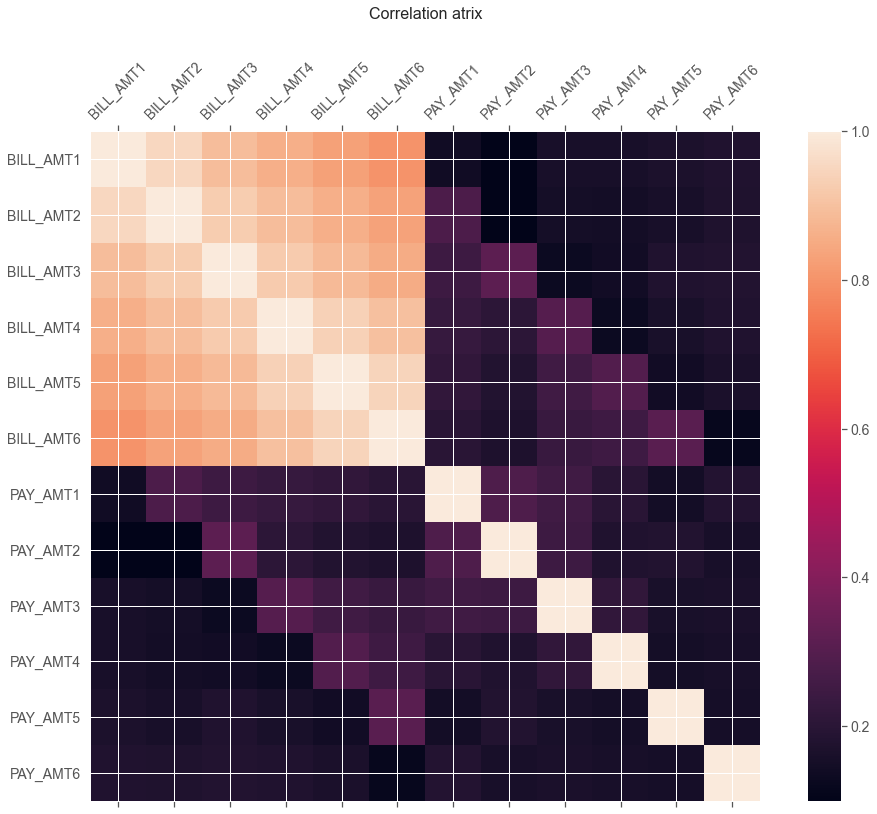

In [15]:
f=plt.figure(figsize=(17,12))
plt.matshow(df_unique.corr(),fignum=f.number)
plt.xticks(range(df_unique.shape[1]),df_unique.columns, fontsize=14, rotation =45)
plt.yticks(range(df_unique.shape[1]),df_unique.columns, fontsize=14)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation atrix\n\n', fontsize=16)

In [16]:
#the very light area (with positive values) confirms quite high dependences among BILL_AMTx features (for instance, coefficient correlation is equal to 0.946 between BILL_AMT6 and BILL_AMT5)

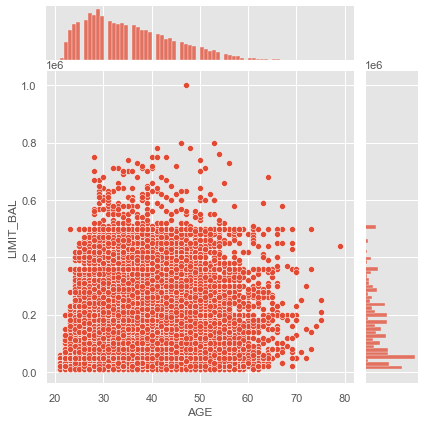

In [17]:
df_ALB=pd.DataFrame(df,columns=['LIMIT_BAL','AGE'])
sns.jointplot(x='AGE',y='LIMIT_BAL',data=df_ALB)

In [18]:
#As we can see, most of the data points are tightly concentrated in the area with boundaries (on average) between 25 and 60 years, and in a range of amount of the given credit before 0.5 NT dollars

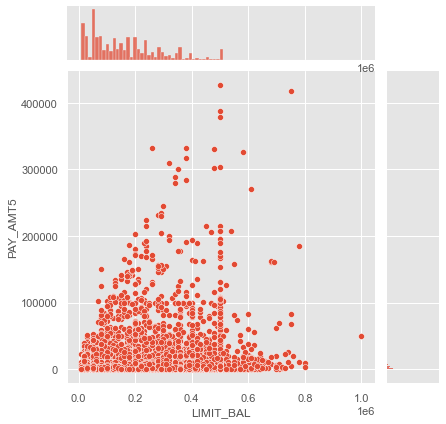

In [19]:
df_LBP=pd.DataFrame(df,columns=['PAY_AMT5','LIMIT_BAL'])
sns.jointplot(x='LIMIT_BAL',y='PAY_AMT5',data=df_LBP)

In [20]:
# data concentrated in a range of amount of the given credit before 0.5 NT dollars and pay amt being $100,000

In [21]:
#What is the share of clients in our DataFrame, who are ready with their default payment in the next month?
print("Part of clients =", '{:.2%}'.format(df["default payment next month"].mean()))

Part of clients = 22.12%


In [22]:
#What are the mean values of the numerical features among the attracted clients?
df[df['default payment next month']==1].mean()

LIMIT_BAL                    130109.656
SEX                               1.567
EDUCATION                         1.895
MARRIAGE                          1.528
AGE                              35.726
PAY_0                             0.668
PAY_2                             0.458
PAY_3                             0.362
PAY_4                             0.255
PAY_5                             0.168
PAY_6                             0.112
BILL_AMT1                     48509.162
BILL_AMT2                     47283.618
BILL_AMT3                     45181.599
BILL_AMT4                     42036.951
BILL_AMT5                     39540.190
BILL_AMT6                     38271.436
PAY_AMT1                       3397.044
PAY_AMT2                       3388.650
PAY_AMT3                       3367.352
PAY_AMT4                       3155.627
PAY_AMT5                       3219.140
PAY_AMT6                       3441.482
default payment next month        1.000
dtype: float64

In [23]:
#Thus, the average age of a typical client is about 35 years (age = 35.726), at the same time, their repayment status has been improved during half a year (based on the values of the variables PAY_0-PAY_6) and they paid with a delay from several weeks (PAY_0 = 0.668) to several days (PAY_6 = 0.112).

In [24]:
# What was the average repayment status (ars) in September 2005 for a typical client who was going to pay in the next month?
ars=round(df[df['default payment next month']==1]['PAY_2'].mean(),2)*100
print("Average repayment status, which was in September, 2005 for the typical client=",ars,'%')

Average repayment status, which was in September, 2005 for the typical client= 46.0 %


In [25]:
#What part of the clients (default payment next month == 1) had paid duly (PAY_0 == -1) in September, 2005?
pd=round(((df['default payment next month']==1).sum()&df['PAY_0'].value_counts()[-1])/df.shape[0],3)*100
print("Part of clients =",pd,'%')

Part of clients = 13.8 %


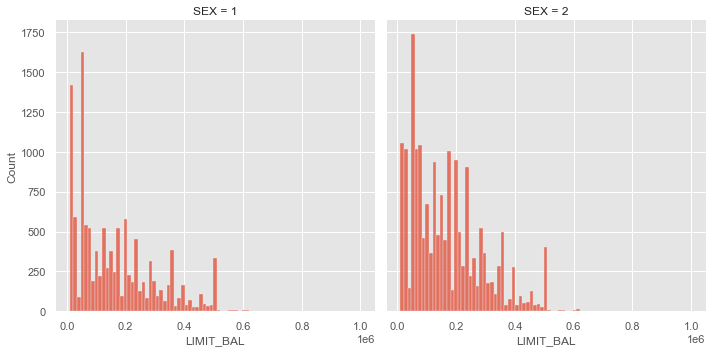

In [26]:
sns.displot(df,x='LIMIT_BAL',col='SEX',multiple='dodge')

In [27]:
# the amount of the given credit (NT dollar) which includes both an individual consumer's credit and their family (supplementary) credit is approximately higher for women.

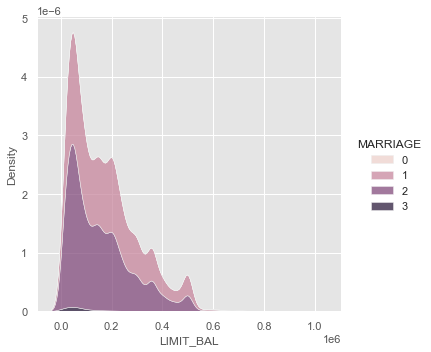

In [28]:
sns.displot(df,x='LIMIT_BAL',hue='MARRIAGE',kind='kde',multiple='stack')

In [29]:
#As you can see, most of the clients are married with a high density of distribution. The group of single clients comes next. And the group of clients with another relationship state closes our distribution in the third place.

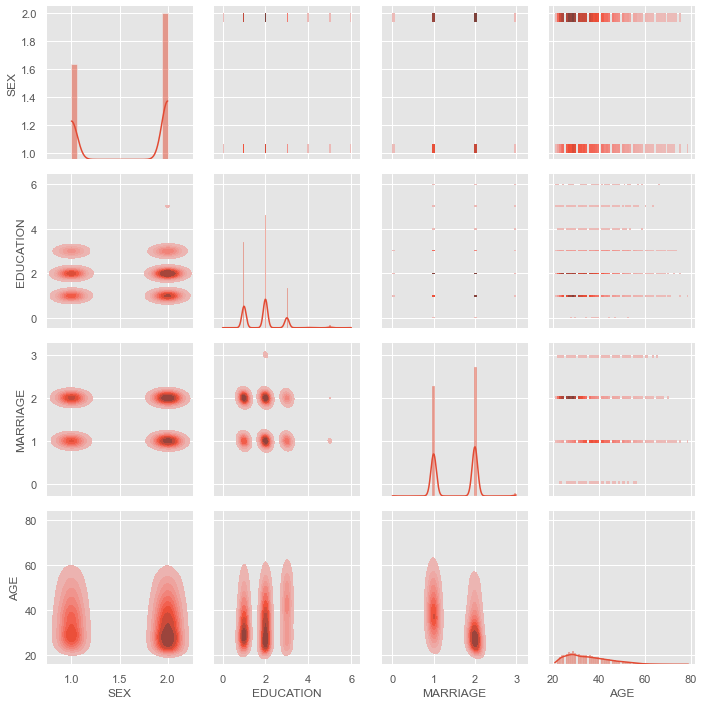

In [30]:
g=sns.PairGrid(df[['SEX','EDUCATION','MARRIAGE','AGE']])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot,fill=True)
g.map_diag(sns.histplot, kde=True)
plt.show()

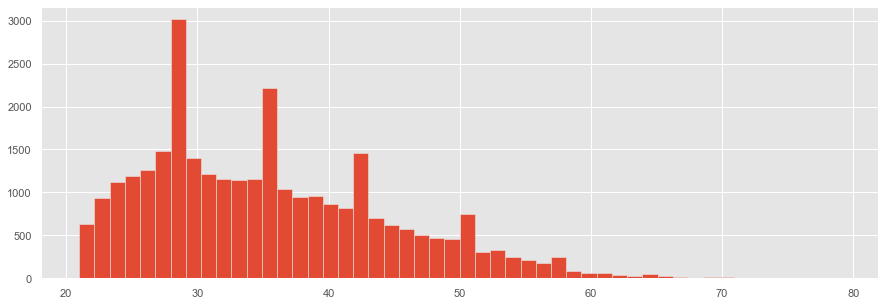

In [31]:
df['AGE'].hist(bins=50)
plt.show()
#The histogram shows that most of our clients are between the ages of (approximately) 21-22 and 44, which corresponds to the actively working part of the population.

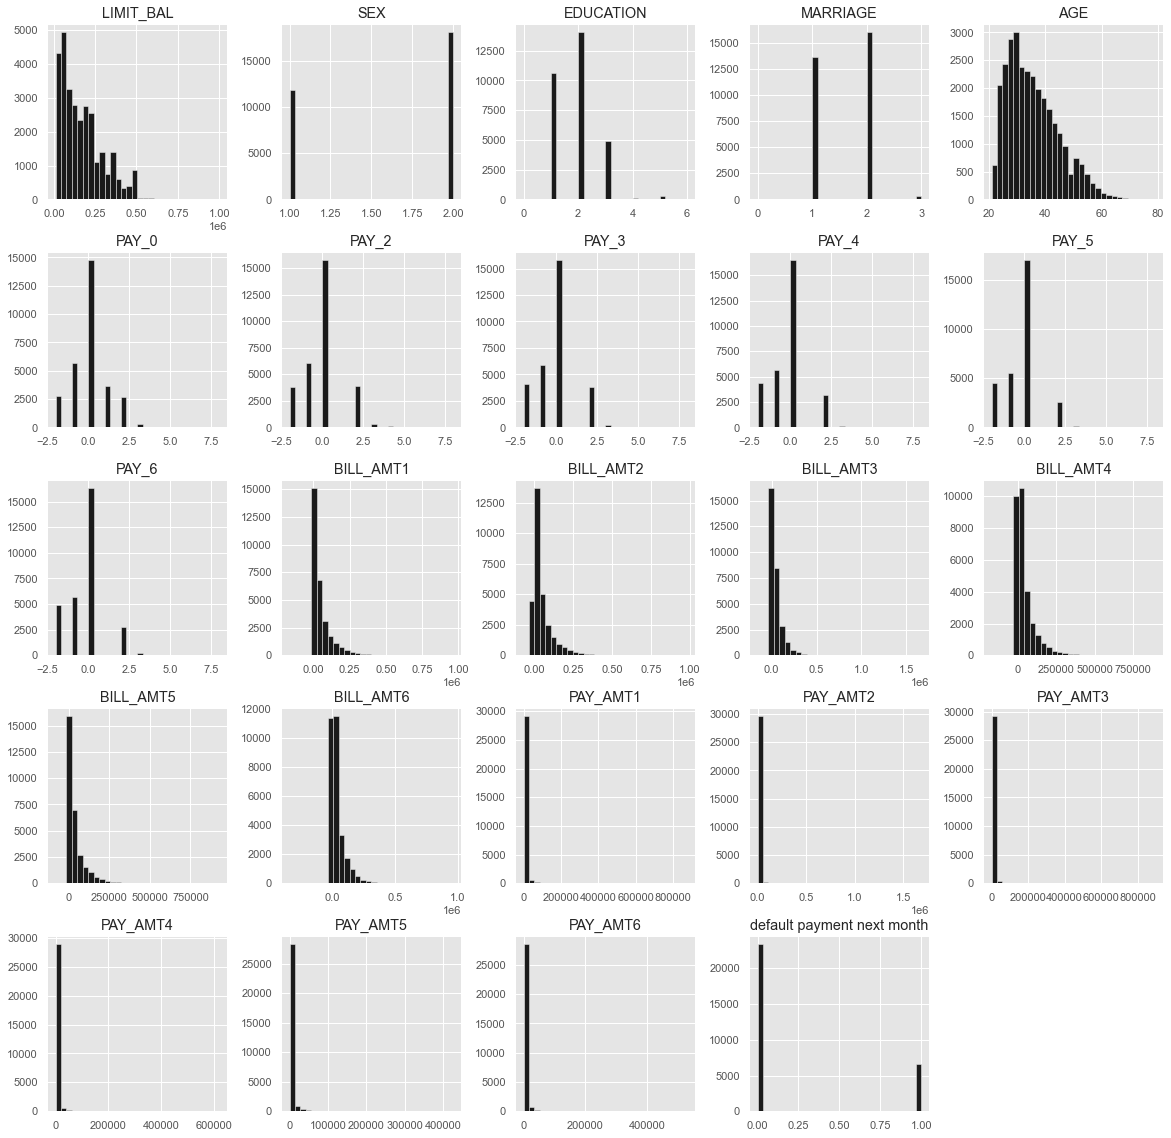

In [38]:
df.hist(color='k',bins=30,figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

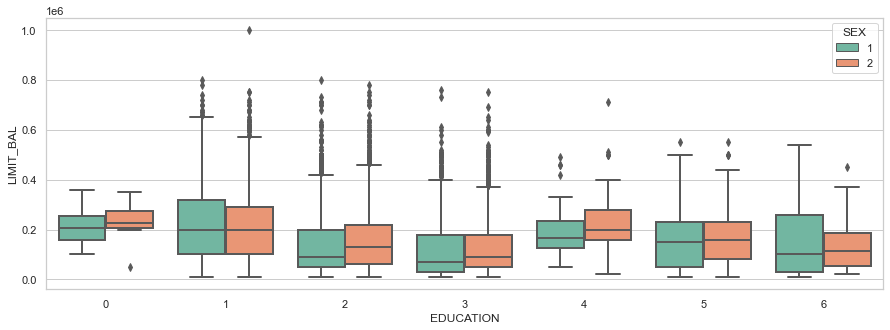

In [39]:
sns.set_theme(style='whitegrid')
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',hue='SEX',data=df,linewidth=2.0,dodge=True,palette='Set2')

In [ ]:
#This plotting shows that people after a graduate school on average have a bigger amount of given credit (NT dollar) than those who have a university or a high school education

<AxesSubplot:xlabel='MARRIAGE', ylabel='AGE'>

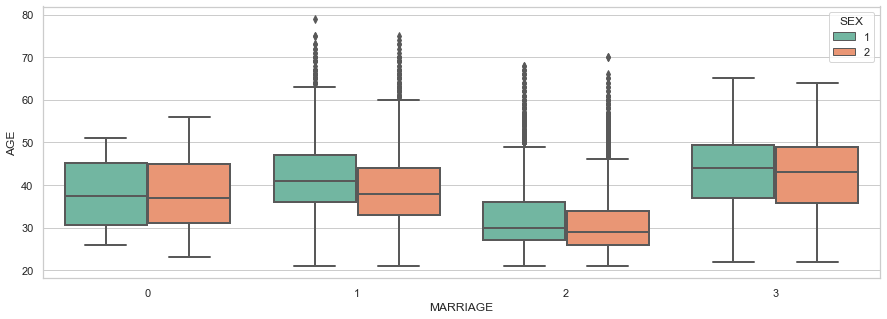

In [40]:
sns.set_theme(style='whitegrid')
sns.boxplot(x='MARRIAGE',y='AGE',hue='SEX',data=df,linewidth=2.0,dodge=True,palette='Set2')

In [41]:
df.sort_values(by="PAY_AMT1",ascending = False)[["PAY_AMT1", "AGE"]].head(15).mean()

PAY_AMT1   381409.467
AGE            35.600
dtype: float64

<AxesSubplot:xlabel='EDUCATION', ylabel='AGE'>

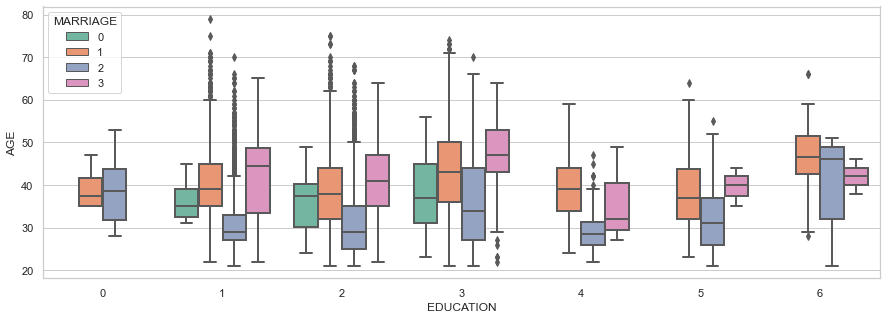

In [42]:
sns.set_theme(style='whitegrid')
sns.boxplot(x='EDUCATION',y='AGE',hue='MARRIAGE',data=df,linewidth=2.0,dodge=True,palette='Set2')

In [ ]:
#Which group has more observations:

# single with a high school education level
#with a minimum number of outliers: married with a high school education
#where the average age is higher for all three education levels: for married
